In [1]:
from nhstravel.gp import GpArea, GpRegion

# Looking at the area around a GP surgery

In [2]:
# Edit this to try a different Gp practice. Uses substring search, if not unique picks the first one
practice_name = "lambeth"

In [3]:
%%time
area = GpRegion.load_england()
gp_df = area.find_practices(practice_name)
gp_df

/usr/local/google/home/nfortescue/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


CPU times: user 1.21 s, sys: 33.3 ms, total: 1.24 s
Wall time: 1.24 s


,Name,Postcode,latitude,longitude,point
4368,LAMBETH WALK GROUP PRACTICE,SE11 6SP,51.505031,-0.085892,POINT (-0.0858923 51.5050313)
4382,THE SOUTH LAMBETH RD PRACTICE,SW9 6SF,51.476307,-0.105411,POINT (-0.1054114 51.4763073)
11716,A&E DIVERSION SCHEME (LAMBETH WALK) WIC,SE11 6SP,51.505031,-0.085892,POINT (-0.0858923 51.5050313)
12637,COMMUNITY PAEDIATRICIANS-LAMBETH,SE11 4TH,51.492640,-0.104708,POINT (-0.1047077467635113 51.4926396)
14827,LAMBETH HEALTHCARE PRACTICE,SE21 8AU,51.501301,-0.117287,POINT (-0.117287 51.5013012)


In [4]:
gp_df.index[0]

4368

In [5]:
%%time
gp_area = area.get_practice_area(gp_df.index[0])
G = gp_area.osm_graph()

CPU times: user 4.76 s, sys: 171 ms, total: 4.93 s
Wall time: 4.93 s


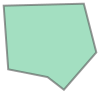

In [6]:
# Plot the region around a GP practice
gp_area.area

## Calculate walking distance times

/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)


CPU times: user 810 ms, sys: 65.5 ms, total: 875 ms
Wall time: 792 ms


<AxesSubplot:>

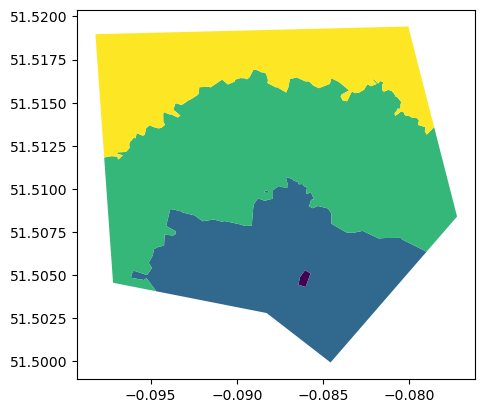

In [7]:
%%time
result = gp_area.calculate_walking_distance_polys(G, radius_minutes=10)
result['color'] = result.index
result.plot(column = 'color')

##  Handling a larger area

In [8]:
from shapely import geometry
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd

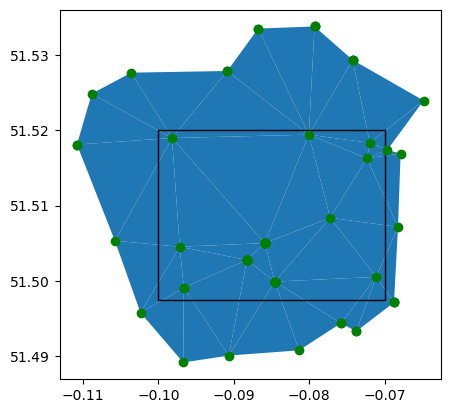

In [9]:
#Choose our larger area as a rectangle around the space above
poly = geometry.Polygon([ [-0.1,51.52], [-0.07,51.52], [-0.07, 51.4975], [-0.1, 51.4975], [-0.1,51.52]])
subregion = area.get_subregion(poly)

subregion.pretty_plot(poly=poly)

In [10]:
%%time

# warning - this is slow. Most time spent fetching maps from osmnx
distance_polys_by_triangle = [subregion.calculate_walking_distance_polys(triangle) for triangle in subregion._triangulation]


/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)
/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)
/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)
/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)
/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree 

CPU times: user 3min 22s, sys: 1.7 s, total: 3min 23s
Wall time: 3min 23s


/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:297: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)


<AxesSubplot:>

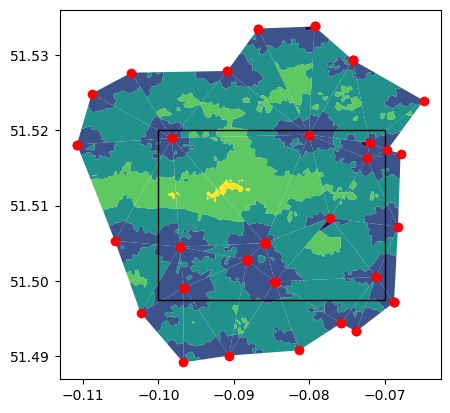

In [11]:
# Plot nicely
all_distance_polys = pd.concat(distance_polys_by_triangle)
fig,ax = plt.subplots()
all_distance_polys['color'] = all_distance_polys.index
all_distance_polys.plot(ax=ax, column = 'color')
gpd.GeoSeries([poly]).plot(ax=ax, ec="black", color="None")
gpd.GeoDataFrame(subregion._df, geometry="point").plot(ax=ax, color="red")